In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import IPython.display as ipd

In [2]:
# read images
lena = cv2.imread('Q1/lena_grayscale.jpg', cv2.IMREAD_GRAYSCALE)
fabric = cv2.imread('Q1/fabric_grayscale.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
# apply fft and obtain amplitude and phase
lenaFFT = np.fft.fft2(lena)
lenaAmp = np.abs(lenaFFT)
lenaPhase = np.angle(lenaFFT)
fabricFFT = np.fft.fft2(fabric)
fabricAmp = np.abs(fabricFFT)
fabricPhase = np.angle(fabricFFT)

Inverse Fourier Transform is needed to recreate the original images from magnitude and phase information

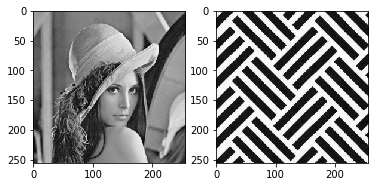

In [4]:
# use ifft to reconstruct images
lenaReconstruction = np.abs(np.fft.ifft2(lenaFFT))
fabricReconstruction = np.abs(np.fft.ifft2(fabricFFT))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(lenaReconstruction, cmap = "gray")
ax2.imshow(fabricReconstruction, cmap = "gray")

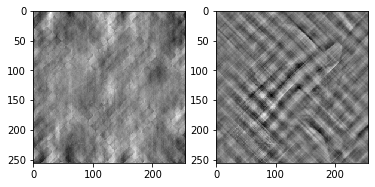

In [5]:
# multiply amplitudes with e^(j*phase)
lAfP = np.real(np.fft.ifft2(lenaAmp * np.exp(1j*fabricPhase)))
lAfP = np.uint8((lAfP-np.min(lAfP))/(np.max(lAfP)-np.min(lAfP))*255)
fAlP = np.real(np.fft.ifft2(fabricAmp * np.exp(1j*lenaPhase)))
fAlP = np.uint8((fAlP-np.min(fAlP))/(np.max(fAlP)-np.min(fAlP))*255)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(lAfP, cmap = "gray")
ax2.imshow(fAlP, cmap = "gray")

Phase carries information related to shading of edges.

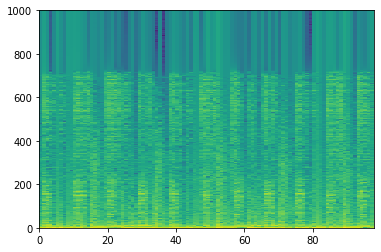

In [6]:
# read amplitudes and phases and plot spectrogram A
amp = np.load('Q2/spectrogram.npy')
phases = np.load('Q2/phases.npy')
ampConcat = np.concatenate((amp, np.flip(amp, axis=1)), axis=1)
plt.pcolormesh(np.transpose(ampConcat)[:ampConcat.shape[1]//2])

In [7]:
# recover the audio
window = 2000
step = 2000
audio = np.empty(len(amp)*step)
ampConcat = np.power(10, ampConcat/10)
for i in range(len(amp)):
    audio[i*window:(i+1)*window] = np.real(np.fft.ifft(ampConcat[i]*np.exp(1j*phases[i])))
audio = audio.reshape(-1)
wavfile.write("recovery.wav", 44100, data=audio)
ipd.Audio(audio, rate=44100)

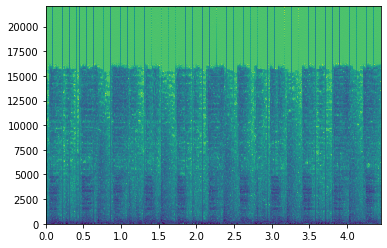

In [8]:
# spectrogram C
epsilon = 0.00001
freq, time, stft500 = signal.stft(audio, fs=44100, window='hann', nperseg=500)
stft500 = 10*np.log10(stft500+epsilon)
plt.pcolormesh(time, freq, np.abs(stft500))

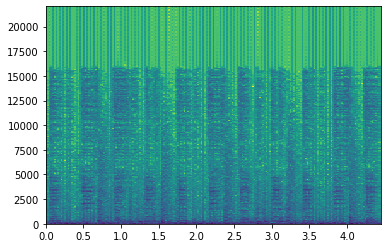

In [9]:
# spectrogram C
freq, time, stft2000 = signal.stft(audio, fs=44100, window='hann', nperseg=2000)
stft2000 = 10*np.log10(stft2000+epsilon)
plt.pcolormesh(time, freq, np.abs(stft2000))

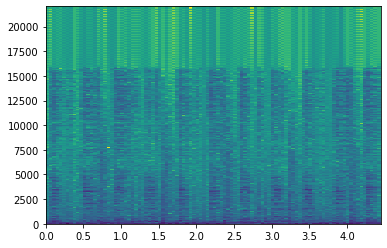

In [10]:
# spectrogram D
freq, time, stft4000 = signal.stft(audio, fs=44100, window='hann', nperseg=4000)
stft4000 = 10*np.log10(stft4000+epsilon)
plt.pcolormesh(time, freq, np.abs(stft4000))

The difference is caused by different lengths of hann windows. With the increasing window size, samples on the x axis decrease.

In [11]:
# define x and y
def resample(samplingFreq, length=1000):
    t = np.arange(length*2*np.pi*samplingFreq)/(2*np.pi*samplingFreq)
    x = np.sin(3*np.pi*t/4+np.pi/2)
    y = np.sin(np.pi*t/4+3*np.pi/5)
    return x, y

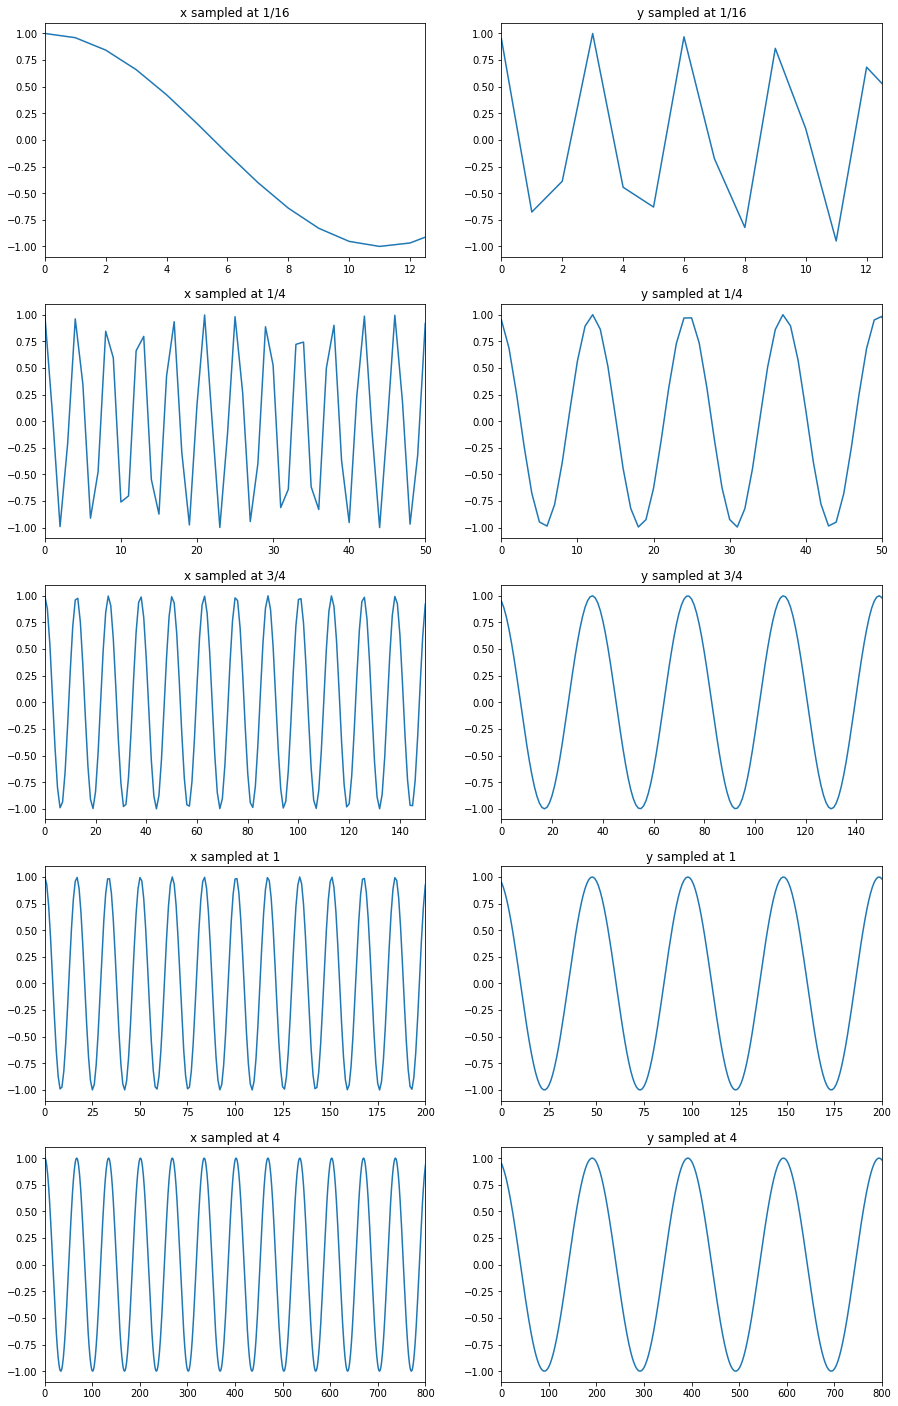

In [12]:
# sample 5 times
fig, axs = plt.subplots(5, 2, figsize=(15,25))
x, y = resample(1/16)
axs[0,0].plot(x)
axs[0,1].plot(y)
axs[0,0].set_xlim([0, 12.5])
axs[0,1].set_xlim([0, 12.5])
axs[0,0].set_title("x sampled at 1/16")
axs[0,1].set_title("y sampled at 1/16")
x, y = resample(1/4)
axs[1,0].plot(x)
axs[1,1].plot(y)
axs[1,0].set_xlim([0, 50])
axs[1,1].set_xlim([0, 50])
axs[1,0].set_title("x sampled at 1/4")
axs[1,1].set_title("y sampled at 1/4")
x, y = resample(3/4)
axs[2,0].plot(x)
axs[2,1].plot(y)
axs[2,0].set_xlim([0, 150])
axs[2,1].set_xlim([0, 150])
axs[2,0].set_title("x sampled at 3/4")
axs[2,1].set_title("y sampled at 3/4")
x, y = resample(1)
axs[3,0].plot(x)
axs[3,1].plot(y)
axs[3,0].set_xlim([0, 200])
axs[3,1].set_xlim([0, 200])
axs[3,0].set_title("x sampled at 1")
axs[3,1].set_title("y sampled at 1")
x, y = resample(4)
axs[4,0].plot(x)
axs[4,1].plot(y)
axs[4,0].set_xlim([0, 800])
axs[4,1].set_xlim([0, 800])
axs[4,0].set_title("x sampled at 4")
axs[4,1].set_title("y sampled at 4")
plt.show()

Minimum sampling rate is 3/4. Because it is double the highest frequency.

In [13]:
def myConvolution(x, y):
    lenx = len(x);
    leny = len(y);
    output = np.zeros(lenx+leny-1);
    for i in range(lenx):
        for j in range(leny):
            output[i+j]=output[i+j]+x[i]*y[j];
    return list(output)

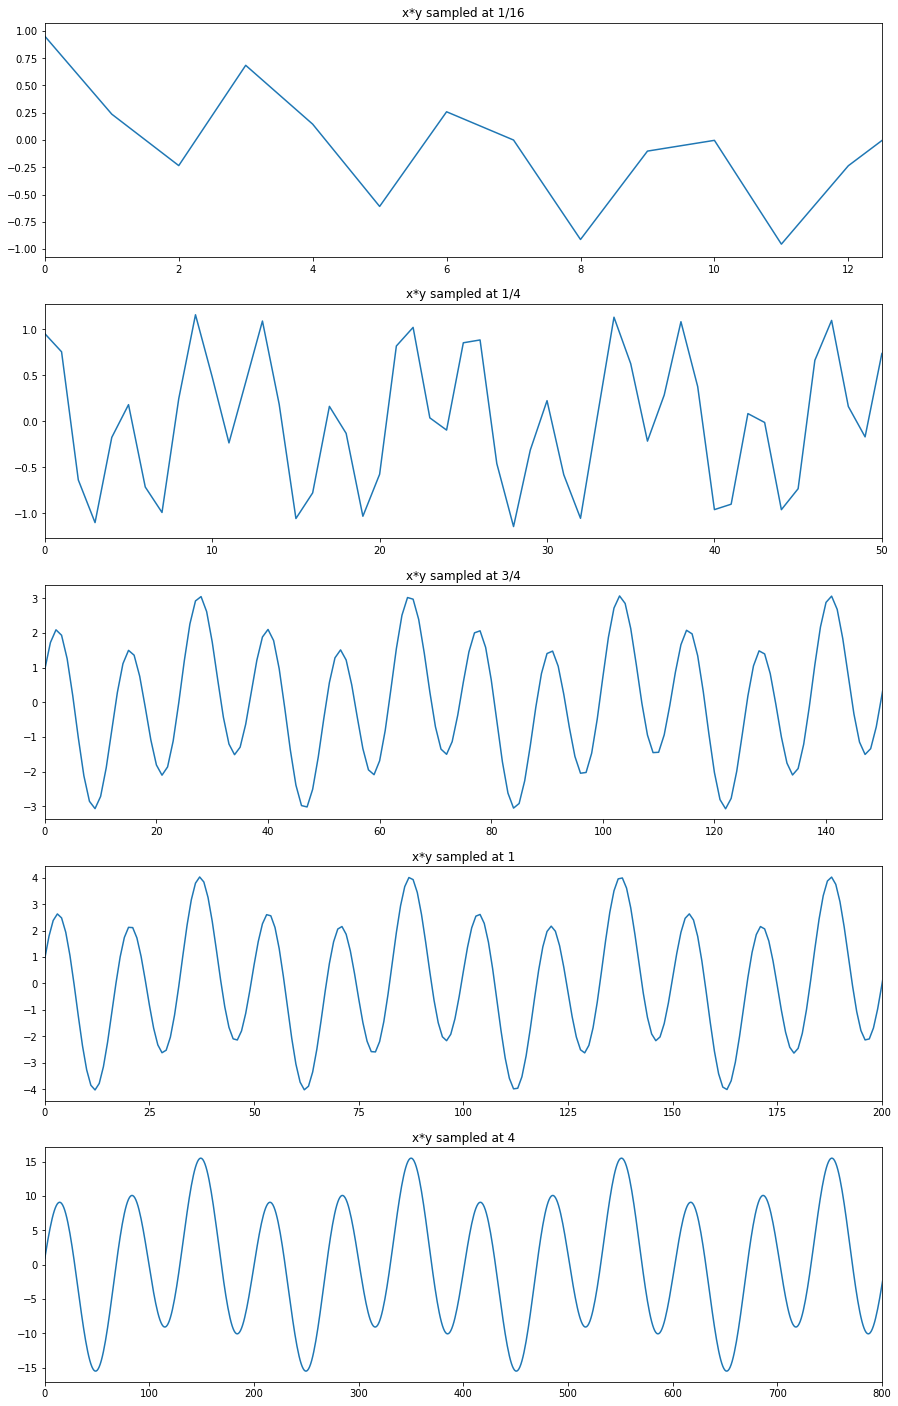

In [14]:
# sample and convolve 5 times
fig, axs = plt.subplots(5, 1, figsize=(15,25))
x, y = resample(1/16)
axs[0].plot(myConvolution(x, y))
axs[0].set_xlim([0, 12.5])
axs[0].set_title("x*y sampled at 1/16")
x, y = resample(1/4)
axs[1].plot(myConvolution(x, y))
axs[1].set_xlim([0, 50])
axs[1].set_title("x*y sampled at 1/4")
x, y = resample(3/4)
axs[2].plot(myConvolution(x, y))
axs[2].set_xlim([0, 150])
axs[2].set_title("x*y sampled at 3/4")
x, y = resample(1)
axs[3].plot(myConvolution(x, y))
axs[3].set_xlim([0, 200])
axs[3].set_title("x*y sampled at 1")
x, y = resample(4)
axs[4].plot(myConvolution(x, y))
axs[4].set_xlim([0, 800])
axs[4].set_title("x*y sampled at 4")
plt.show()

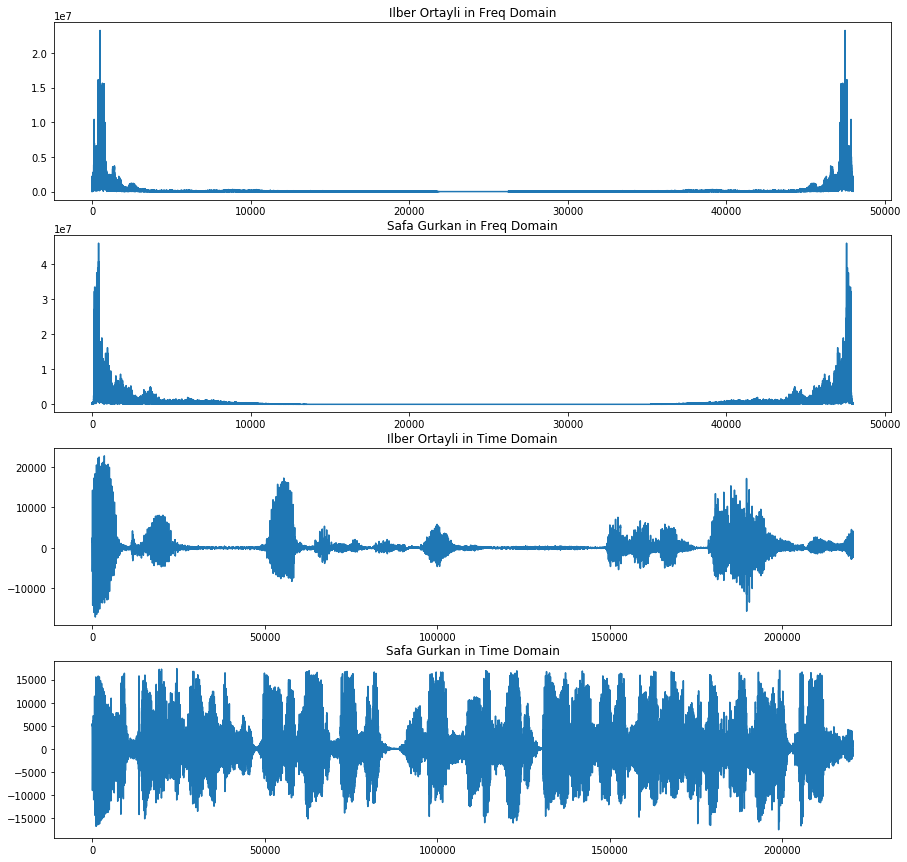

In [15]:
# read audio files and extract channels
Fs, ilber = wavfile.read("Q4/ilber_ortaylı.wav")
Fs, safa = wavfile.read("Q4/esg.wav")
ilber = ilber[:,0]
safa = safa[:,0]
# plot audio files in time and freq domain
fig, axs = plt.subplots(4, 1, figsize=(15,15))
axs[0].plot(np.linspace(0, Fs, len(ilber)), np.abs(np.fft.fft(ilber)))
axs[1].plot(np.linspace(0, Fs, len(safa)), np.abs(np.fft.fft(safa)))
axs[0].set_title("Ilber Ortayli in Freq Domain")
axs[1].set_title("Safa Gurkan in Freq Domain")
axs[2].plot(ilber)
axs[3].plot(safa)
axs[2].set_title("Ilber Ortayli in Time Domain")
axs[3].set_title("Safa Gurkan in Time Domain")
plt.show()

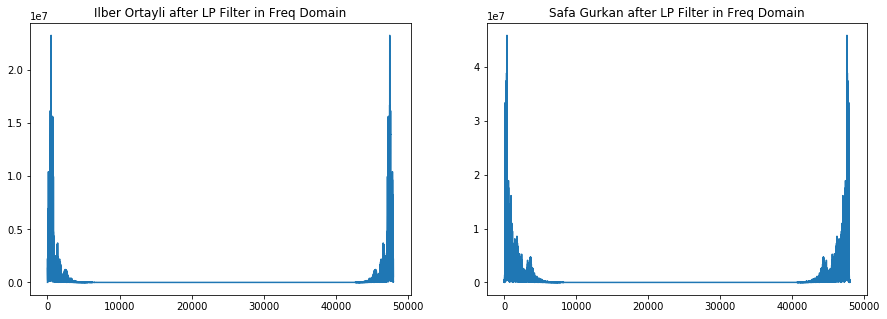

In [16]:
# set bandwiths (BW) and apply low pass filter
ilberBW = 4000
safaBW = 5000
b, a = signal.butter(5, ilberBW, 'low', fs=Fs)
ilberLP = signal.filtfilt(b, a, ilber)
b, a = signal.butter(5, safaBW, 'low', fs=Fs)
safaLP = signal.filtfilt(b, a, safa)
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(np.linspace(0, Fs, len(ilberLP)), np.abs(np.fft.fft(ilberLP)))
axs[1].plot(np.linspace(0, Fs, len(safaLP)), np.abs(np.fft.fft(safaLP)))
axs[0].set_title("Ilber Ortayli after LP Filter in Freq Domain")
axs[1].set_title("Safa Gurkan after LP Filter in Freq Domain")
plt.show()

Signals get mixed with one another if we do not use bandlimited signals

In [17]:
# produce carrier signals
carrier1Freq = 4500
carrier2Freq = 14000
carrier1 = np.cos(2*np.pi*carrier1Freq*np.arange(len(ilber))/Fs)
carrier2 = np.cos(2*np.pi*carrier2Freq*np.arange(len(safa))/Fs)

Carrier 1 freq is 4500 because it has enough bandwith to carry Ilber Ortayli's voice. Carrier 2 freq is 14000 because Ilber Ortayli's voice is between 500-8500 and Safa Gurkan's voice has to come after that and not overlap. So 8500 + 5000 < 14000.

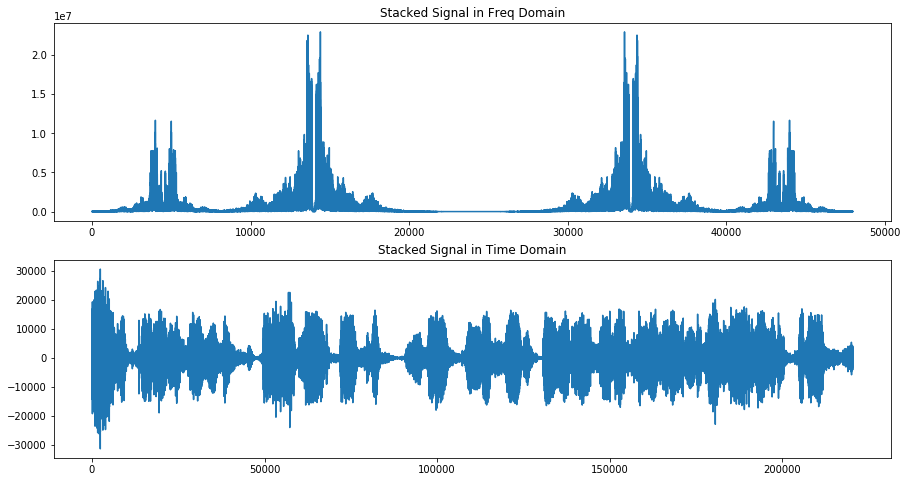

In [18]:
# obtain stacked signal and plot
ilberAM = ilberLP*carrier1
safaAM = safaLP*carrier2
stackedSignal = ilberAM + safaAM
fig, axs = plt.subplots(2, 1, figsize=(15,8))
axs[0].plot(np.linspace(0, Fs, len(stackedSignal)), np.abs(np.fft.fft(stackedSignal)))
axs[1].plot(stackedSignal)
axs[0].set_title("Stacked Signal in Freq Domain")
axs[1].set_title("Stacked Signal in Time Domain")
plt.show()

[500, 8500] [9000, 19000]


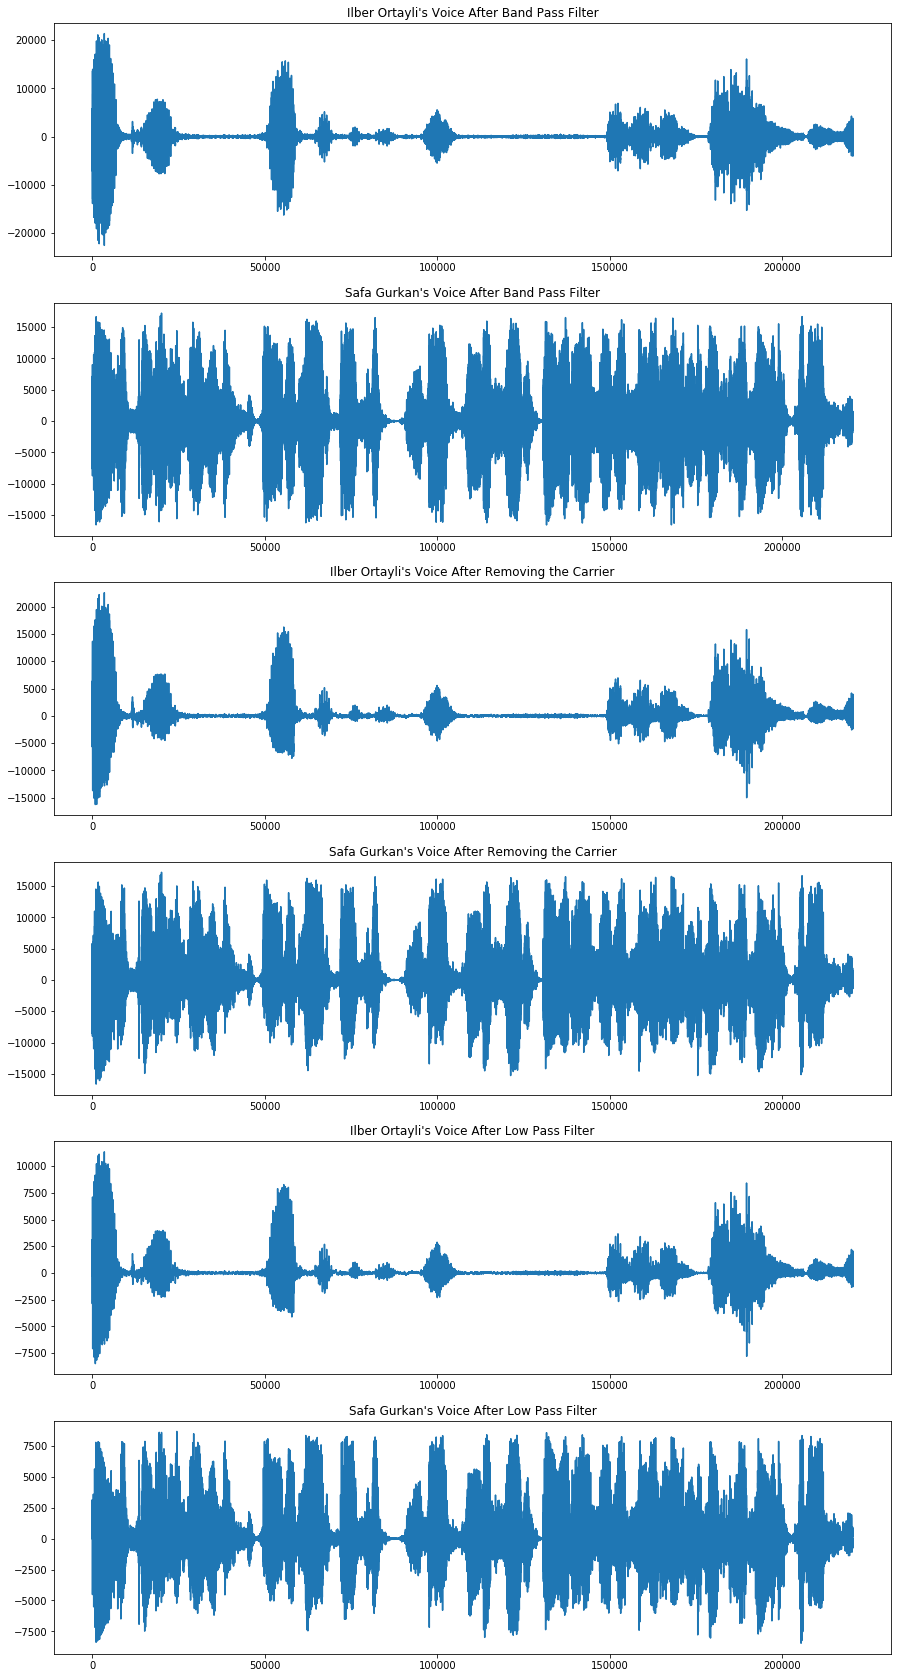

In [19]:
# demultiplexing and plotting
ilberBW2 = [carrier1Freq-ilberBW, carrier1Freq+ilberBW]
b, a = signal.butter(5, ilberBW2, 'band', fs=Fs)
ilberBP = signal.filtfilt(b, a, stackedSignal)
safaBW2 = [carrier2Freq-safaBW, carrier2Freq+safaBW]
b, a = signal.butter(5, safaBW2, 'band', fs=Fs)
safaBP = signal.filtfilt(b, a, stackedSignal)
ilberCR = carrier1*ilberBP
safaCR = carrier2*safaBP
b, a = signal.butter(5, ilberBW, 'low', fs=Fs)
ilberFinal = signal.filtfilt(b, a, ilberCR)
b, a = signal.butter(5, safaBW, 'low', fs=Fs)
safaFinal = signal.filtfilt(b, a, safaCR)

print(ilberBW2, safaBW2)

fig, axs = plt.subplots(6, 1, figsize=(15,30))
axs[0].plot(ilberBP)
axs[0].set_title("Ilber Ortayli's Voice After Band Pass Filter")
axs[1].plot(safaBP)
axs[1].set_title("Safa Gurkan's Voice After Band Pass Filter")
axs[2].plot(ilberCR)
axs[2].set_title("Ilber Ortayli's Voice After Removing the Carrier")
axs[3].plot(safaCR)
axs[3].set_title("Safa Gurkan's Voice After Removing the Carrier")
axs[4].plot(ilberFinal)
axs[4].set_title("Ilber Ortayli's Voice After Low Pass Filter")
axs[5].plot(safaFinal)
axs[5].set_title("Safa Gurkan's Voice After Low Pass Filter")
plt.show()

Low cutoff freq of band pass of Ilber Ortayli is 500 hertz
High cutoff freq of band pass of Ilber Ortayli is 8500 hertz
Low cutoff freq of band pass of Safa Gurkan is 9000 hertz
High cutoff freq of band pass of Safa Gurkan is 19000 hertz
Cutoff freq of low pass of Ilber Ortayli is 4500 hertz
Cutoff freq of low pass of Safa Gurkan is 14000 hertz
These filters are used in order to separate voices from the stacked signal.

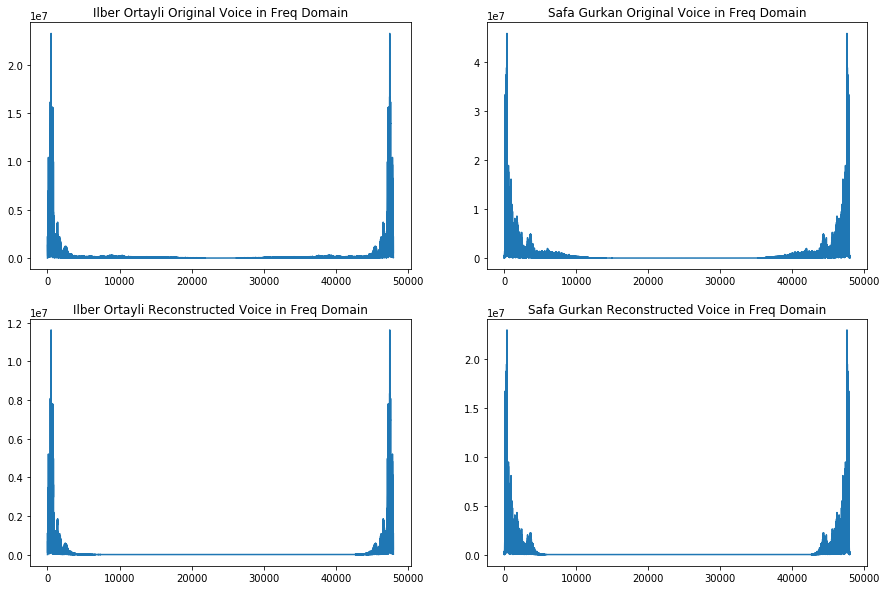

In [20]:
# comparing reconstructed signals with original ones
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(np.linspace(0, Fs, len(ilber)), np.abs(np.fft.fft(ilber)))
axs[0, 1].plot(np.linspace(0, Fs, len(safa)), np.abs(np.fft.fft(safa)))
axs[0, 0].set_title("Ilber Ortayli Original Voice in Freq Domain")
axs[0, 1].set_title("Safa Gurkan Original Voice in Freq Domain")
axs[1, 0].plot(np.linspace(0, Fs, len(ilberFinal)), np.abs(np.fft.fft(ilberFinal)))
axs[1, 1].plot(np.linspace(0, Fs, len(safaFinal)), np.abs(np.fft.fft(safaFinal)))
axs[1, 0].set_title("Ilber Ortayli Reconstructed Voice in Freq Domain")
axs[1, 1].set_title("Safa Gurkan Reconstructed Voice in Freq Domain")
plt.show()

In [21]:
# save audio files of the historians
# historian 1 = Ilber Ortayli, historian 2 = Safa Gurkan
def saveAudio(historian):
    if historian == 1:
        norm = ilberFinal/np.max(ilberFinal)
        wavfile.write("Q4/ilberReconstructed.wav", 44100, data=norm)
    elif historian == 2:
        norm = safaFinal/np.max(safaFinal)
        wavfile.write("Q4/safaReconstructed.wav", 44100, data=norm)
        
# call the function
saveAudio(1)
saveAudio(2)

Reconstructed audio files sound very good.

In [22]:
# overlapped run and save
ilberBW = 4000
safaBW = 5000
b, a = signal.butter(5, ilberBW, 'low', fs=Fs)
ilberLP = signal.filtfilt(b, a, ilber)
b, a = signal.butter(5, safaBW, 'low', fs=Fs)
safaLP = signal.filtfilt(b, a, safa)
carrier1Freq = 4500
carrier2Freq = 6000
carrier1 = np.cos(2*np.pi*carrier1Freq*np.arange(len(ilber))/Fs)
carrier2 = np.cos(2*np.pi*carrier2Freq*np.arange(len(safa))/Fs)
ilberAM = ilberLP*carrier1
safaAM = safaLP*carrier2
stackedSignal = ilberAM + safaAM
ilberBW2 = [carrier1Freq-ilberBW, carrier1Freq+ilberBW]
b, a = signal.butter(5, ilberBW2, 'band', fs=Fs)
ilberBP = signal.filtfilt(b, a, stackedSignal)
safaBW2 = [carrier2Freq-safaBW, carrier2Freq+safaBW]
b, a = signal.butter(5, safaBW2, 'band', fs=Fs)
safaBP = signal.filtfilt(b, a, stackedSignal)
ilberCR = carrier1*ilberBP
safaCR = carrier2*safaBP
b, a = signal.butter(5, ilberBW, 'low', fs=Fs)
ilberFinal = signal.filtfilt(b, a, ilberCR)
b, a = signal.butter(5, safaBW, 'low', fs=Fs)
safaFinal = signal.filtfilt(b, a, safaCR)
norm1 = ilberFinal/np.max(ilberFinal)
wavfile.write("Q4/ilberOverlapped.wav", 44100, data=norm1)
norm2 = safaFinal/np.max(safaFinal)
wavfile.write("Q4/safaOverlapped.wav", 44100, data=norm2)

Due to the overlap, the reconstructed audio files sound horrible.